In [1]:
import matplotlib.pyplot as plt
import numpy as np

import librosa
from librosa import display

from scipy.io import wavfile

float32
[-6.4993765e-05 -1.4493740e-04 -2.3466274e-04 ...  3.2075806e-04
  7.4998540e-04  5.5393472e-04] 
 22050


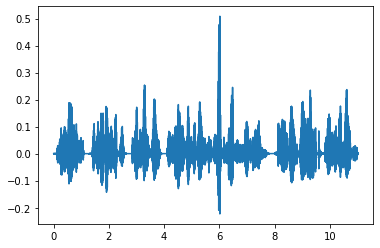

In [2]:
filename = "tmp_audio/clnsp0.wav"
data, samplerate = librosa.load(filename)
# samplerate, data = wavfile.read("inputaudio.wav")
print(data.dtype)
print(data,'\n', samplerate)

time = len(data) / samplerate
plt.plot(np.linspace(0,time,len(data)), data)
plt.show()

# mel filter
定義我家的 mel filter 長怎樣

In [43]:
filter_band = librosa.filters.mel(n_fft=2048,sr=samplerate,n_mels=6)
filter_band.shape

(6, 1025)

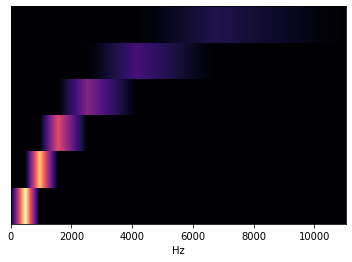

In [44]:
plt.figure()
librosa.display.specshow(filter_band,sr=samplerate,x_axis="linear")
plt.show()

In [35]:
mel_spectrogram = librosa.feature.melspectrogram(data,sr=samplerate,n_fft=2048, hop_length=1024,n_mels=3)

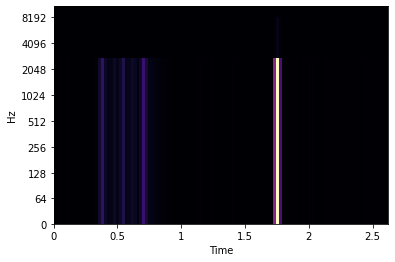

In [42]:
plt.figure()
librosa.display.specshow(mel_spectrogram,sr=samplerate,x_axis="time",y_axis="log")
plt.show()

# STFT

In [3]:
S = librosa.stft(data,n_fft=320,hop_length=80)
print(S.shape)

(161, 3038)


In [4]:
print(data.shape)
S = librosa.stft(data,n_fft=1000,hop_length=100)
print(S.shape)

y_hat = librosa.istft(S)
print(y_hat)
print(data)

(242991,)
(501, 2430)
[-6.9980328e-05 -1.3099363e-04 -1.8823397e-04 ... -3.3214458e-04
 -2.7415826e-04  9.2033471e-05]
[-6.4993765e-05 -1.4493740e-04 -2.3466274e-04 ...  3.2075806e-04
  7.4998540e-04  5.5393472e-04]


In [84]:
import winsound
import wavio
Idata = np.array(np.array(y_hat*10000),np.int32)
wavio.write("mytune.wav",Idata,samplerate)

filename = "mytune.wav"
winsound.PlaySound(filename, winsound.SND_FILENAME)

d:\venv\TensorFlow\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


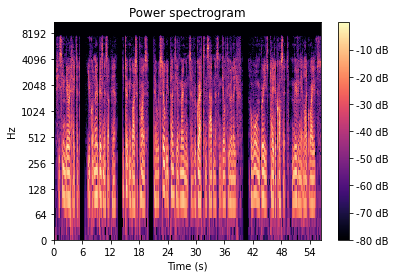

In [5]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                               y_axis='log', 
                               x_axis='s', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")